<a href="https://colab.research.google.com/github/karthik5115/basic-ml/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

here in this final project we are taking a dataset named netflix and its recommendations. in this dataset we are performing  exploratory data analysis(EDA) on models, some predictions based on recommendations,answering some usefull question and makeing EDA on them spliting daat into 80-20%, building machine learnig models..... 

EXPLORATORY DATA ANALYSIS (**EDA**)

importing the libraries....

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading the dataset

In [122]:
netflix = pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


shape of the dataset 

In [123]:
netflix.shape

(8807, 12)

let us count the dataset

In [124]:
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

**SHOWS VS MOVIES**

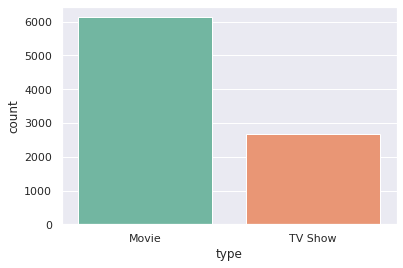

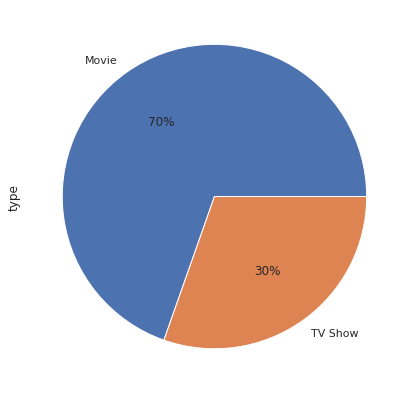

In [125]:
netflix_shows = netflix[netflix['type']=='TV Shows']
netflix_movies = netflix[netflix['type']=='Movie']
#Time for visulization
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

plt.figure(figsize=(7, 7))
netflix['type'].value_counts().plot(kind='pie',autopct='%1.0f%%')

**MOVIE RATING ANALYSIS**

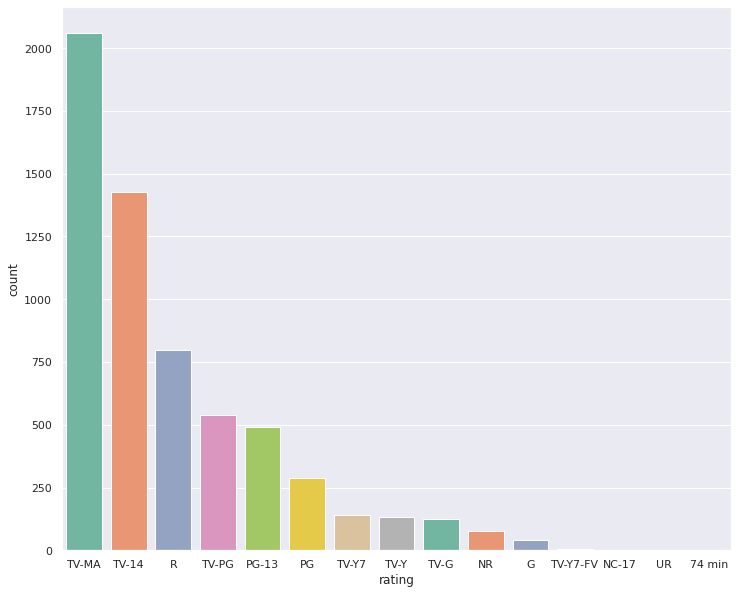

In [126]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

TOP 10 COUNTRIES WITH MOVIES AND SHOWS IN NETFLIX

Text(0.5, 1.0, 'Top 10 countries with movies and tv shows')

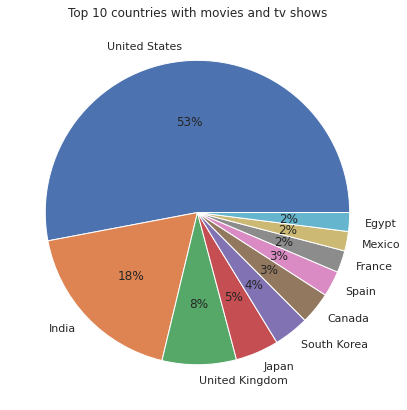

In [127]:
values = netflix['country'].value_counts()[:10].tolist()
labels = netflix['country'].value_counts()[:10].index.tolist()
plt.figure(figsize=(7, 7))
plt.pie(values,labels=labels,autopct='%1.0f%%')
plt.title('Top 10 countries with movies and tv shows')

CONTENT ADDED BY YEARS 


In [128]:
netflix['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [129]:
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])

In [130]:
date = pd.DataFrame(netflix['date_added'])
added = date['date_added'].str.split(', ',expand = True)
date['MD'] = added[0]
date['Year'] = added[1]
date.head()

,date_added,MD,Year
0,"September 25, 2021",September 25,2021
1,"September 24, 2021",September 24,2021
2,"September 24, 2021",September 24,2021
3,"September 24, 2021",September 24,2021
4,"September 24, 2021",September 24,2021


year wise analysis

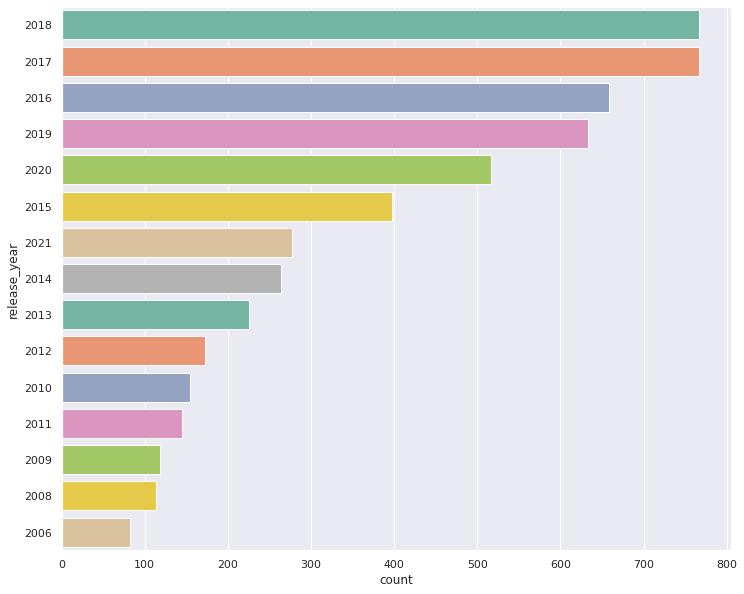

In [131]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])

top 10 content creating countries

> Indented block



In [132]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'India')]

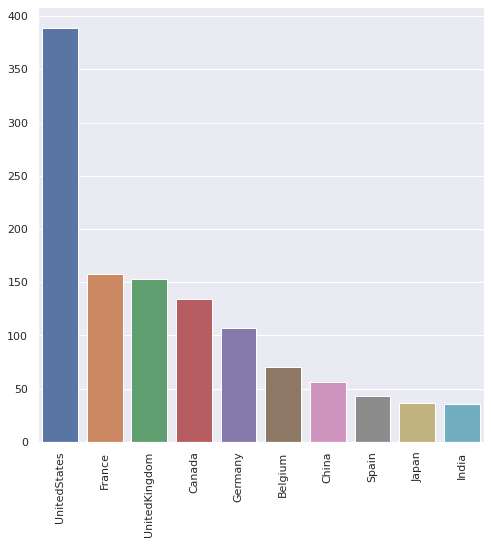

In [133]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

DATA CLEANING

In [134]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

if the null value is not in NAN format the python does not consider it as none values. so the below code is used to handle that type of situations...

In [135]:
missing_values = ['Na','n/a','NA']
netflix = pd.read_csv('/content/netflix_titles.csv',na_values=missing_values)
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

showing null values in a heat map

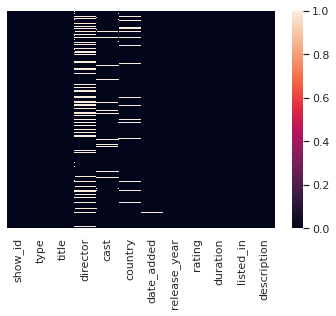

In [136]:
sns.heatmap(netflix.isnull(), yticklabels=False)

removing the missing values

In [137]:
netflix.dropna

<bound method DataFrame.dropna of      show_id  ...                                        description
0         s1  ...  As her father nears the end of his life, filmm...
1         s2  ...  After crossing paths at a party, a Cape Town t...
2         s3  ...  To protect his family from a powerful drug lor...
3         s4  ...  Feuds, flirtations and toilet talk go down amo...
4         s5  ...  In a city of coaching centers known to train I...
...      ...  ...                                                ...
8802   s8803  ...  A political cartoonist, a crime reporter and a...
8803   s8804  ...  While living alone in a spooky town, a young g...
8804   s8805  ...  Looking to survive in a world taken over by zo...
8805   s8806  ...  Dragged from civilian life, a former superhero...
8806   s8807  ...  A scrappy but poor boy worms his way into a ty...

[8807 rows x 12 columns]>

fill the missing values with 0

In [138]:
netflix.fillna(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,0,0,0,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


but filling every none value with zero is not correct lets find a new method...

In [139]:
netflix.fillna(method='ffill')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


it is also not a convinient method to solve the above issue but it is the better one 
another method that is interpolate which means average

In [140]:
netflix.interpolate()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


train-test splits using sklearn

In [141]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(netflix, test_size=0.20, random_state=42)    #test = 20% and train = 80%


In [142]:

len(test)   #20%

1762

In [143]:
len(train)   #80%

7045

In [144]:
len(netflix)    #100%

8807

showing the first 5 rows of trainning dataset and testing dataset...

In [145]:
train.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5471,s5472,Movie,Joshua: Teenager vs. Superpower,Joe Piscatella,NaN,United States,"May 26, 2017",2017,TV-14,79 min,Documentaries,"Mobilized by teenage activist Joshua Wong, you..."
530,s531,TV Show,Richie Rich,NaN,"Jake Brennan, Joshua Carlon, Lauren Taylor, Je...",United States,"July 6, 2021",2015,TV-G,2 Seasons,"Kids' TV, TV Comedies","After turning his veggies into green energy, R..."
5594,s5595,Movie,Trevor Noah: Afraid of the Dark,David Paul Meyer,Trevor Noah,United States,"February 21, 2017",2017,TV-14,67 min,Stand-Up Comedy,"The ""Daily Show"" host ponders the perils of na..."
996,s997,Movie,HOMUNCULUS,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...
6951,s6952,TV Show,Heavy Rescue: 401,NaN,Dave Pettitt,Canada,"June 22, 2018",2018,TV-MA,2 Seasons,"International TV Shows, Reality TV","In the harshest weather, rookie and veteran he..."


In [146]:
test.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
3362,s3363,Movie,Arsenio Hall: Smart & Classy,Brian Volk-Weiss,Arsenio Hall,United States,"October 29, 2019",2019,TV-MA,63 min,Stand-Up Comedy,"In his first stand-up special, Arsenio Hall di..."
5494,s5495,TV Show,Kazoops!,NaN,"Reece Pockney, Scott Langley, Alex Babic, Gemm...",Australia,"May 5, 2017",2017,TV-Y,3 Seasons,Kids' TV,Music meets imagination in this inventive anim...
1688,s1689,TV Show,We Are the Champions,NaN,NaN,United States,"November 17, 2020",2020,TV-MA,1 Season,"Docuseries, Reality TV","Explore an array of unique competitions, from ..."
1349,s1350,TV Show,"Pablo Escobar, el patrón del mal",NaN,"Andrés Parra, Angie Cepeda, Cecilia Navia, Vic...",Colombia,"February 3, 2021",2012,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",From his days as a petty thief to becoming hea...


In [147]:
train2, val = train_test_split(train,test_size=0.20,random_state=42)

In [148]:
val.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8083,s8084,TV Show,Star-Crossed,NaN,"Aimee Teegarden, Matt Lanter, Grey Damon, Male...",United States,"April 16, 2015",2014,TV-14,1 Season,"Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy",The passionate love between an alien boy and a...
2051,s2052,Movie,Ave Maryam,Ertanto Robby Soediskam,"Maudy Koesnaedi, Chicco Jerikho, Tutie Kirana,...",Indonesia,"September 3, 2020",2018,TV-PG,73 min,"Dramas, Independent Movies, International Movies",A devoted nun who cares for her elder sisters ...
7756,s7757,TV Show,Portlandia,NaN,"Fred Armisen, Carrie Brownstein",United States,"September 25, 2019",2018,TV-14,8 Seasons,TV Comedies,Fred Armisen and Carrie Brownstein send up the...
3385,s3386,TV Show,"Breakfast, Lunch & Dinner",NaN,"David Chang, Seth Rogen, Chrissy Teigen, Lena ...",United States,"October 23, 2019",2019,TV-MA,1 Season,Docuseries,Chef David Chang takes his insatiable curiosit...
7122,s7123,Movie,Jealousy and medicine,Janusz Majewski,"Mariusz Dmochowski, Ewa Krzyżewska, Włodzimier...",Poland,"October 1, 2019",1973,TV-MA,97 min,"Dramas, International Movies, Romantic Movies","Tormented by mistrust, a businessman hires a c..."


In [149]:
y = netflix['release_year']
y

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [150]:
x = netflix.drop(columns='release_year')
x.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [151]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20,random_state=42)

In [152]:
x_train.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
5471,s5472,Movie,Joshua: Teenager vs. Superpower,Joe Piscatella,NaN,United States,"May 26, 2017",TV-14,79 min,Documentaries,"Mobilized by teenage activist Joshua Wong, you..."
530,s531,TV Show,Richie Rich,NaN,"Jake Brennan, Joshua Carlon, Lauren Taylor, Je...",United States,"July 6, 2021",TV-G,2 Seasons,"Kids' TV, TV Comedies","After turning his veggies into green energy, R..."
5594,s5595,Movie,Trevor Noah: Afraid of the Dark,David Paul Meyer,Trevor Noah,United States,"February 21, 2017",TV-14,67 min,Stand-Up Comedy,"The ""Daily Show"" host ponders the perils of na..."
996,s997,Movie,HOMUNCULUS,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...
6951,s6952,TV Show,Heavy Rescue: 401,NaN,Dave Pettitt,Canada,"June 22, 2018",TV-MA,2 Seasons,"International TV Shows, Reality TV","In the harshest weather, rookie and veteran he..."


In [153]:
y_train

5471    2017
530     2015
5594    2017
996     2021
6951    2018
        ... 
5734    2016
5191    2010
5390    2014
860     2020
7270    2015
Name: release_year, Length: 7045, dtype: int64

In [154]:
x_test.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
3362,s3363,Movie,Arsenio Hall: Smart & Classy,Brian Volk-Weiss,Arsenio Hall,United States,"October 29, 2019",TV-MA,63 min,Stand-Up Comedy,"In his first stand-up special, Arsenio Hall di..."
5494,s5495,TV Show,Kazoops!,NaN,"Reece Pockney, Scott Langley, Alex Babic, Gemm...",Australia,"May 5, 2017",TV-Y,3 Seasons,Kids' TV,Music meets imagination in this inventive anim...
1688,s1689,TV Show,We Are the Champions,NaN,NaN,United States,"November 17, 2020",TV-MA,1 Season,"Docuseries, Reality TV","Explore an array of unique competitions, from ..."
1349,s1350,TV Show,"Pablo Escobar, el patrón del mal",NaN,"Andrés Parra, Angie Cepeda, Cecilia Navia, Vic...",Colombia,"February 3, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",From his days as a petty thief to becoming hea...


In [155]:
y_test

4970    2018
3362    2019
5494    2017
1688    2020
1349    2012
        ... 
6844    1990
4447    2006
7974    2013
7146    2017
3320    2013
Name: release_year, Length: 1762, dtype: int64

that's it for splitting the data set into training and testing 
note: if you are not giving the test size automatically the python takes it as 0.25 means off 25% and 75% 

**RECOMMENDATIONS**

creating model

In [156]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
print('Decision Tree Classifier Created')


Decision Tree Classifier Created


In [158]:
rec = netflix[['title','director','cast','listed_in','description']]
rec.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [159]:
rec.isnull().sum()

title             0
director       2634
cast            825
listed_in         0
description       0
dtype: int64

In [160]:
rec['director'].replace(np.nan,'unknown',inplace=True)
rec['cast'].replace(np.nan,'unknown',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [161]:
rec['cast'] = rec['cast'].str.replace(', ',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
rec['listed_in'] = rec['listed_in'].str.replace(', ',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
rec['combined'] = rec['title'] + ' ' + rec['director'] + ' ' + rec['cast'] + ' ' + rec['listed_in'] + ' ' + rec['description']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
rec.drop(['cast','director','listed_in','description'],axis=1,inplace=True, errors='ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [165]:
rec.head()

,title,combined
0,Dick Johnson Is Dead,Dick Johnson Is Dead Kirsten Johnson unknown D...
1,Blood & Water,Blood & Water unknown Ama Qamata Khosi Ngema G...
2,Ganglands,Ganglands Julien Leclercq Sami Bouajila Tracy ...
3,Jailbirds New Orleans,Jailbirds New Orleans unknown unknown Docuseri...
4,Kota Factory,Kota Factory unknown Mayur More Jitendra Kumar...


In [166]:
rec['combined'][1]

'Blood & Water unknown Ama Qamata Khosi Ngema Gail Mabalane Thabang Molaba Dillon Windvogel Natasha Thahane Arno Greeff Xolile Tshabalala Getmore Sithole Cindy Mahlangu Ryle De Morny Greteli Fincham Sello Maake Ka-Ncube Odwa Gwanya Mekaila Mathys Sandi Schultz Duane Williams Shamilla Miller Patrick Mofokeng International TV Shows TV Dramas TV Mysteries After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(rec['combined'].str.lower())

tfidf_matrix.shape

(8807, 52938)

In [168]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(rec.index)

RangeIndex(start=0, stop=8807, step=1)


In [169]:
indices = pd.Series(rec.index, index=rec['title']).drop_duplicates()
type(indices)

pandas.core.series.Series

In [170]:
def get_recommendations(title, cosine_sim=cosine_sim):
    try:
        idx = indices[title]
    except:
        return None
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    match = [i[0] for i in sim_scores]
    score = [i[1] for i in sim_scores]
    dictionary = dict(zip(match, score))
    return dictionary

In [171]:
def recommend(title):
    result = get_recommendations(title)
    #print(result)
    if result is None:
        print(f'{title} not found in database')
    else:
        print(f'Movie related to {title} are: ')
        for i in result:
            print(f"{rec['title'].iloc[i]} with score {result[i]*100:.2f} %")

In [172]:
recommend('Blood & Water')

Movie related to Blood & Water are: 
Diamond City with score 11.17 %
Kings of Jo'Burg with score 8.47 %
Shirkers with score 7.73 %
The Future of Water with score 7.42 %
Lady in the Water with score 7.04 %
Dive Club with score 6.38 %
Frank and Cindy with score 6.38 %
Get Even with score 6.28 %
Lion Pride with score 6.08 %
The Keepers with score 6.05 %


the above recommendations are usefull for the viewer to watch the content....